# Kazakh-British Technical University
### Introduction to Machine Learning

## Homework:  Gradient Descent and Method Newton for real data

 Deadline: 03.04.2024 00:00

### Task of Gradient Descent and Newton-Raphson for real data. Read carefully and first be introduced !!
*This file consist several task to complete. Some codes are already prepared and no need to make changes. Do and write the code only in the indicated points and try to get the expected result. While plotting the chart you may get a bit different graph in term of size and style. The graph is **accepted** if it illustrates the point what is asked. Some part of this work is educational and pay more attention.
This work is estimated for 1 - score
You will be earning the score for each completed part os exercises.*

This notebook walks through all the necessary steps to create GD from scratch in Python. Gradient Descent is an essential part of many machine learning algorithms, including neural networks. To understand how it works you will need some basic math and logical thinking. Though a stronger math background would be preferable to understand derivatives, I will try to explain them as simple as possible.

We will work with the California housing dataset and perform a linear regression to predict apartment prices based on the median income in the block.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

## California Housing Dataset

Scikit-learn comes with wide variety of datasets for regression, classification and other problems. Lets load our data into pandas dataframe and take a look.

In [2]:
housing_data = fetch_california_housing()

**TASK TO COMPLETE**

In [3]:
Features = #your code
Target = #your code

In [4]:
df = Features.join(Target)

Features as `MedInc` and `Target` were scaled to some degree.

In [5]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Preprocessing: Removing Outliers and Scaling

In [6]:
df[['MedInc', 'Target']].describe()[1:] #.style.highlight_max(axis=0)

,MedInc,Target
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


It seems that `Target` has some outliers (as well as `MedInc`), because 75% of the data has price less than 2.65, but maximum price go as high as 5. We're going to remove extremely expensive houses as they will add unnecessary noize to the data.

In [7]:
df = df[df.Target < 3.5]
df = df[df.MedInc < 8]

### Removed Outliers

In [8]:
df[['MedInc', 'Target']].describe()[1:]

,MedInc,Target
mean,3.482030,1.722805
std,1.364922,0.749957
min,0.499900,0.149990
25%,2.452025,1.119000
50%,3.303600,1.635000
75%,4.346050,2.256000
max,7.988700,3.499000


We will also scale `MedInc` and `Target` variables to [0-1].

**TASK TO COMPLETE**

In [9]:
def scale(x):
    # your code

X = scale(df.MedInc)
y = scale(df.Target)

In [10]:
X.max(), y.max() # features are scaled now

(1.0, 1.0)

## Correlation Between Price and Income

Visually we can determine what kind of accuracy we can expect from the models.

**TASK TO COMPLETE**

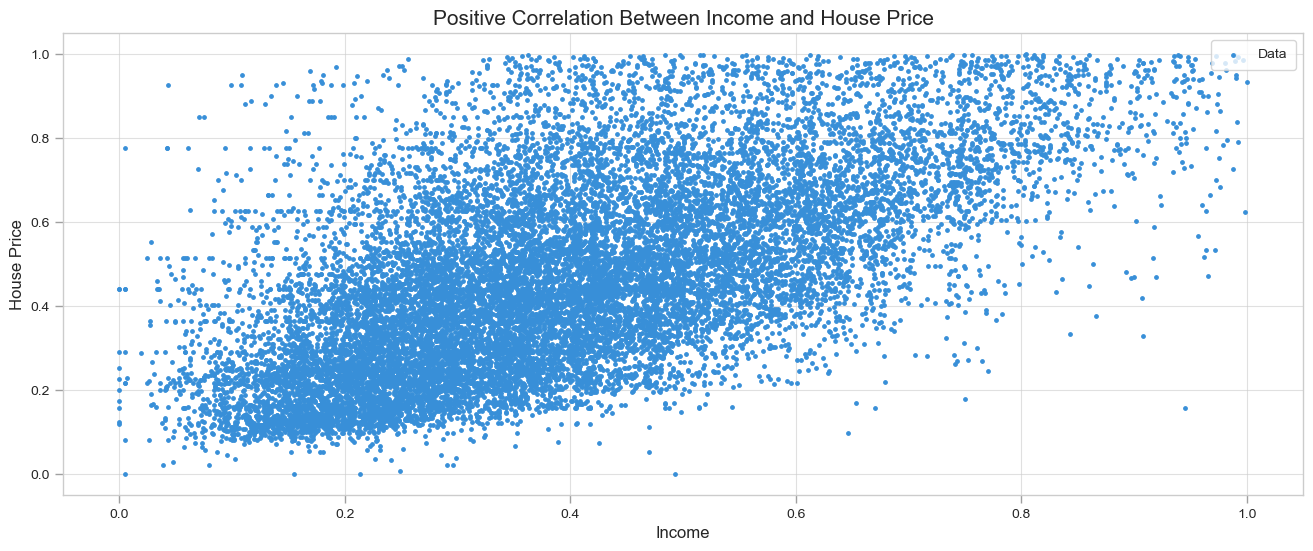

In [11]:
# your code

SCORE: 0.1

### Expected Value

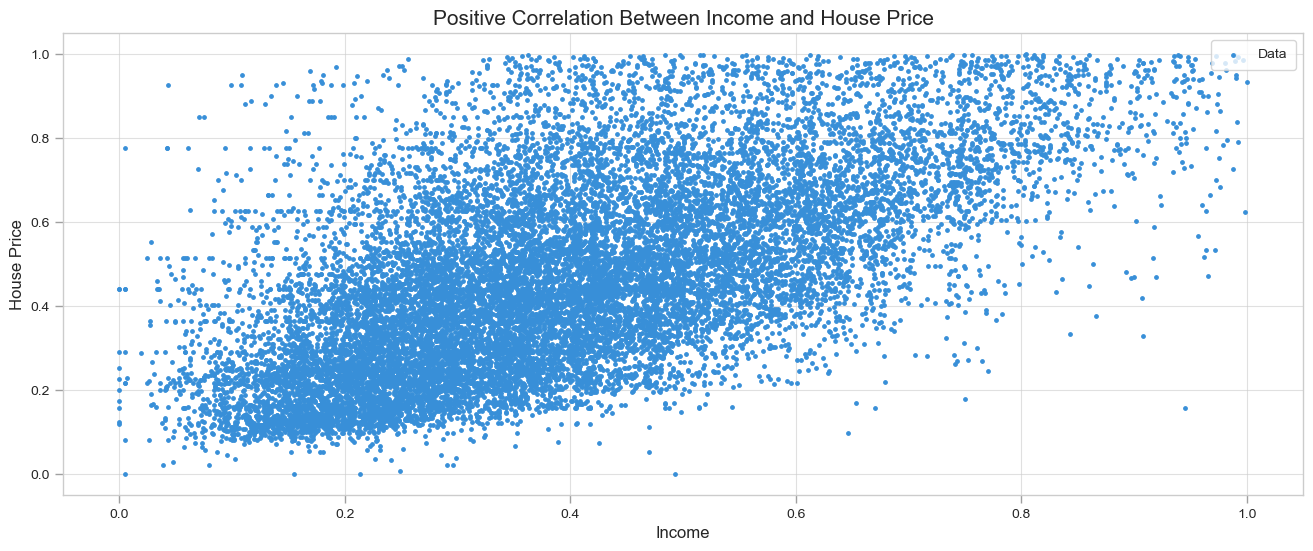

Data is quite sparse, but we can still observe some linearity.

# Simple Linear Regression

Simple linear regression can be described by only two parameters: slope `m` and intercept `b`, where `x` is our **median income**. Lets take a look at the formulas below:

# $$\hat{y} = mx + b$$

### $$m = \frac{\overline{x}\overline{y}-\overline{xy}}{(\overline{x})^2 - \overline{x^2}} \quad \textrm{and} \quad  b = y-mx$$

If we want to add some other features, like size of the apartment, our formula would look like this: $\hat{y} = m_1x_1 + m_2x_2 + b$, where $m_1$ and $m_2$ are slopes for each feature $x_1$ and $x_2$. In this case we would call it multiple linear regression, but we could no longer use formulas above.

**TASK TO COMPLETE**

Do not use the sklearn library!!

In [12]:
class SimpleLinearRegression:
        
    def fit(self, X, y):
        # your code
    
    def coeffs(self):
        # your code
    
    def predict(self):
        # your code
    
    def r_squared(self):
        # your code

In [13]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontsize=14)
    plt.xlabel('Income', fontsize=11)
    plt.ylabel('Price', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

In [14]:
X = df.MedInc
y = df.Target

In [15]:
lr = SimpleLinearRegression()

In [16]:
lr.fit(X, y)

In [17]:
y_pred = lr.predict()

MSE: 0.34320521502255963


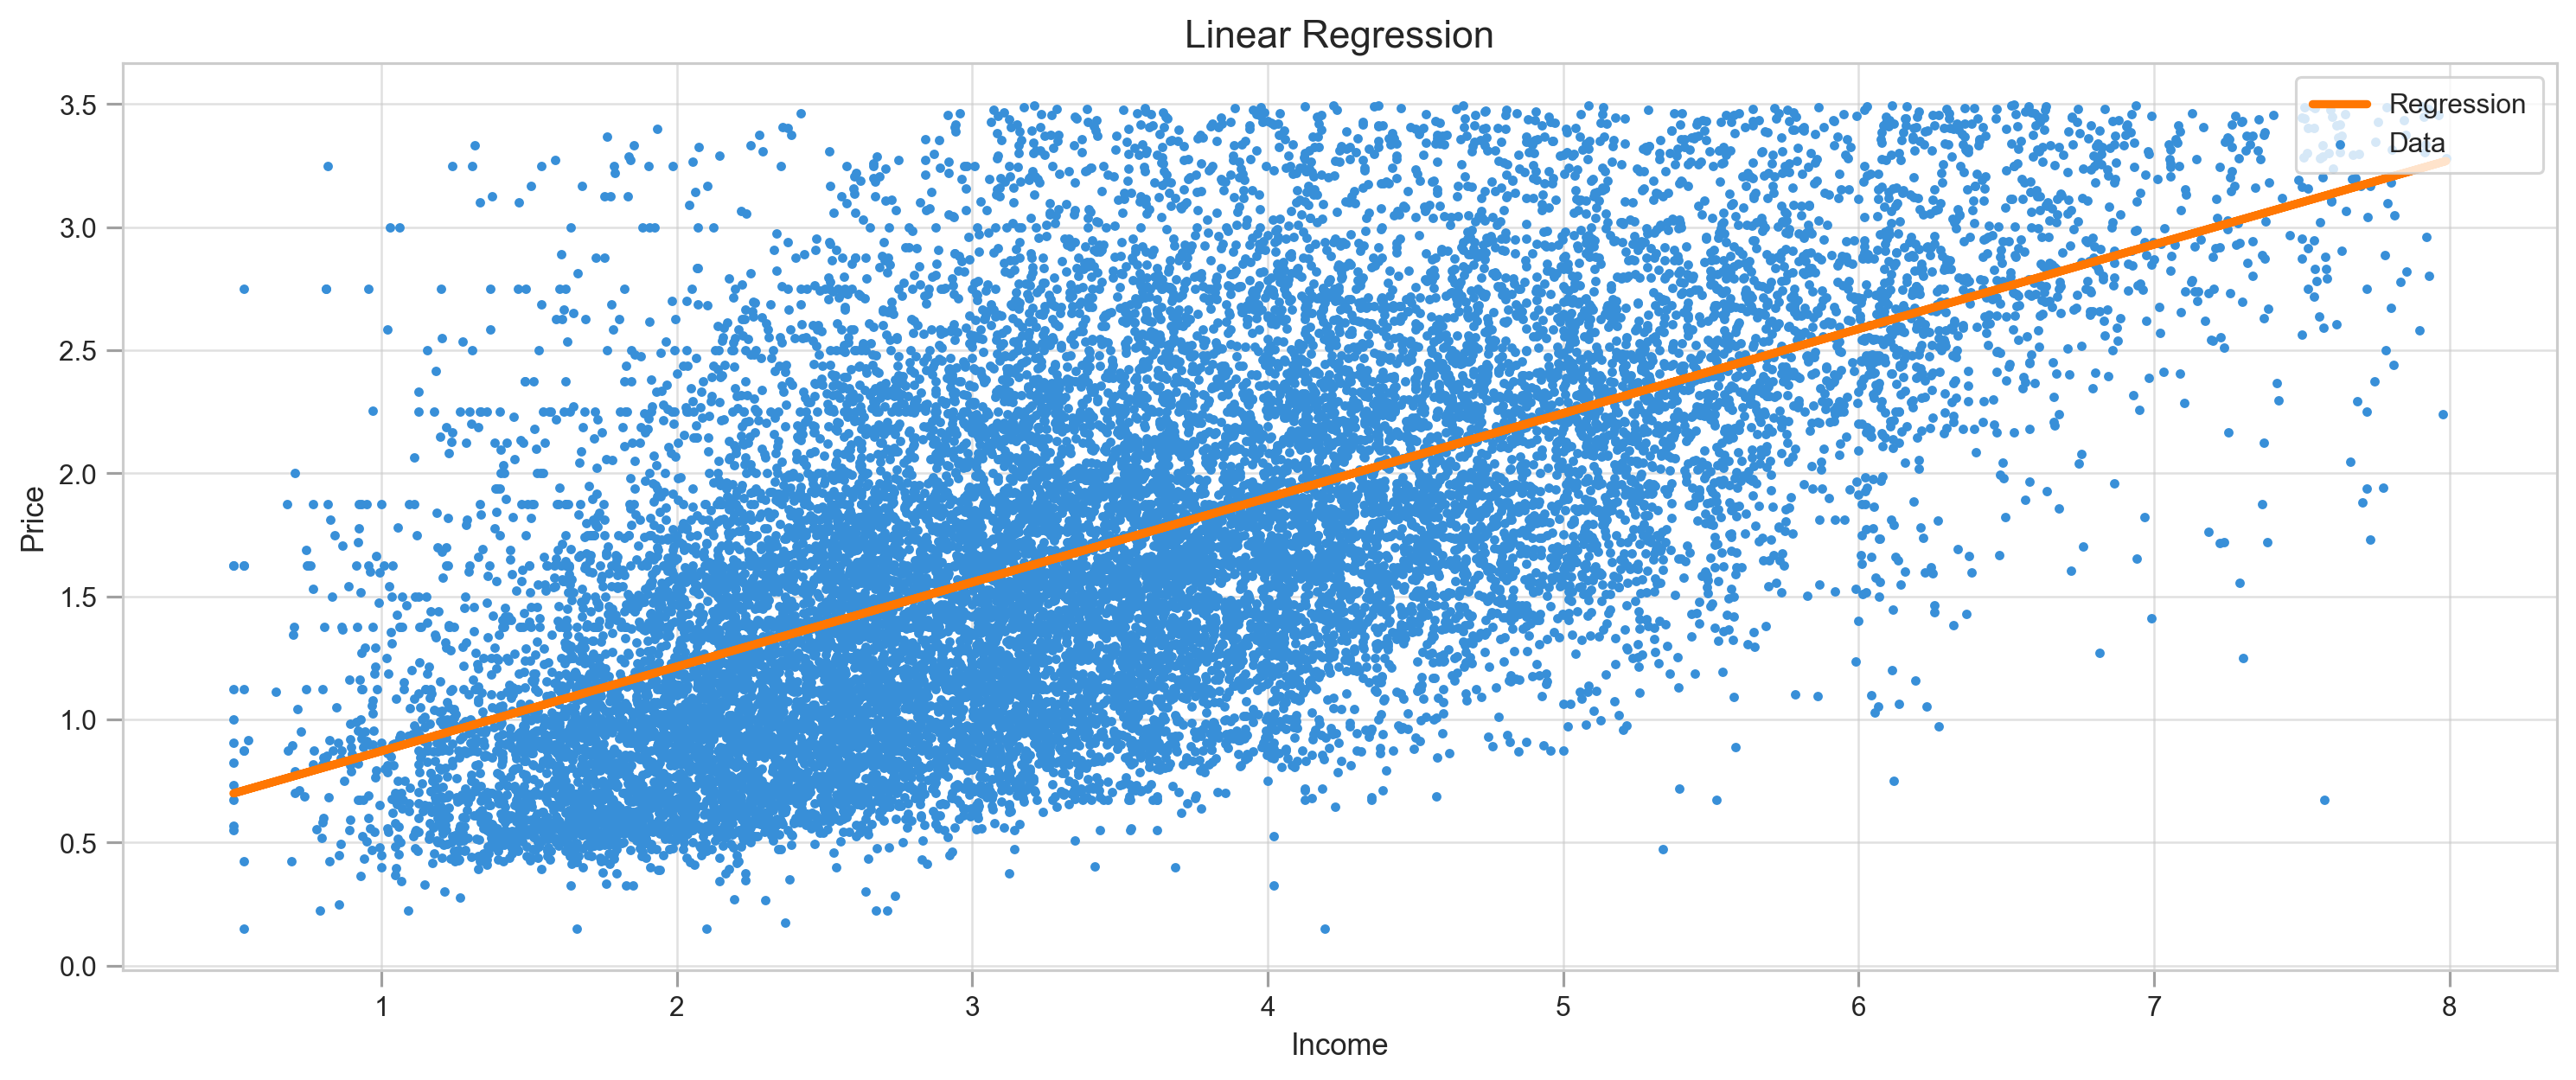

In [18]:
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title="Linear Regression")

SCORE: 0.3

### Expected results
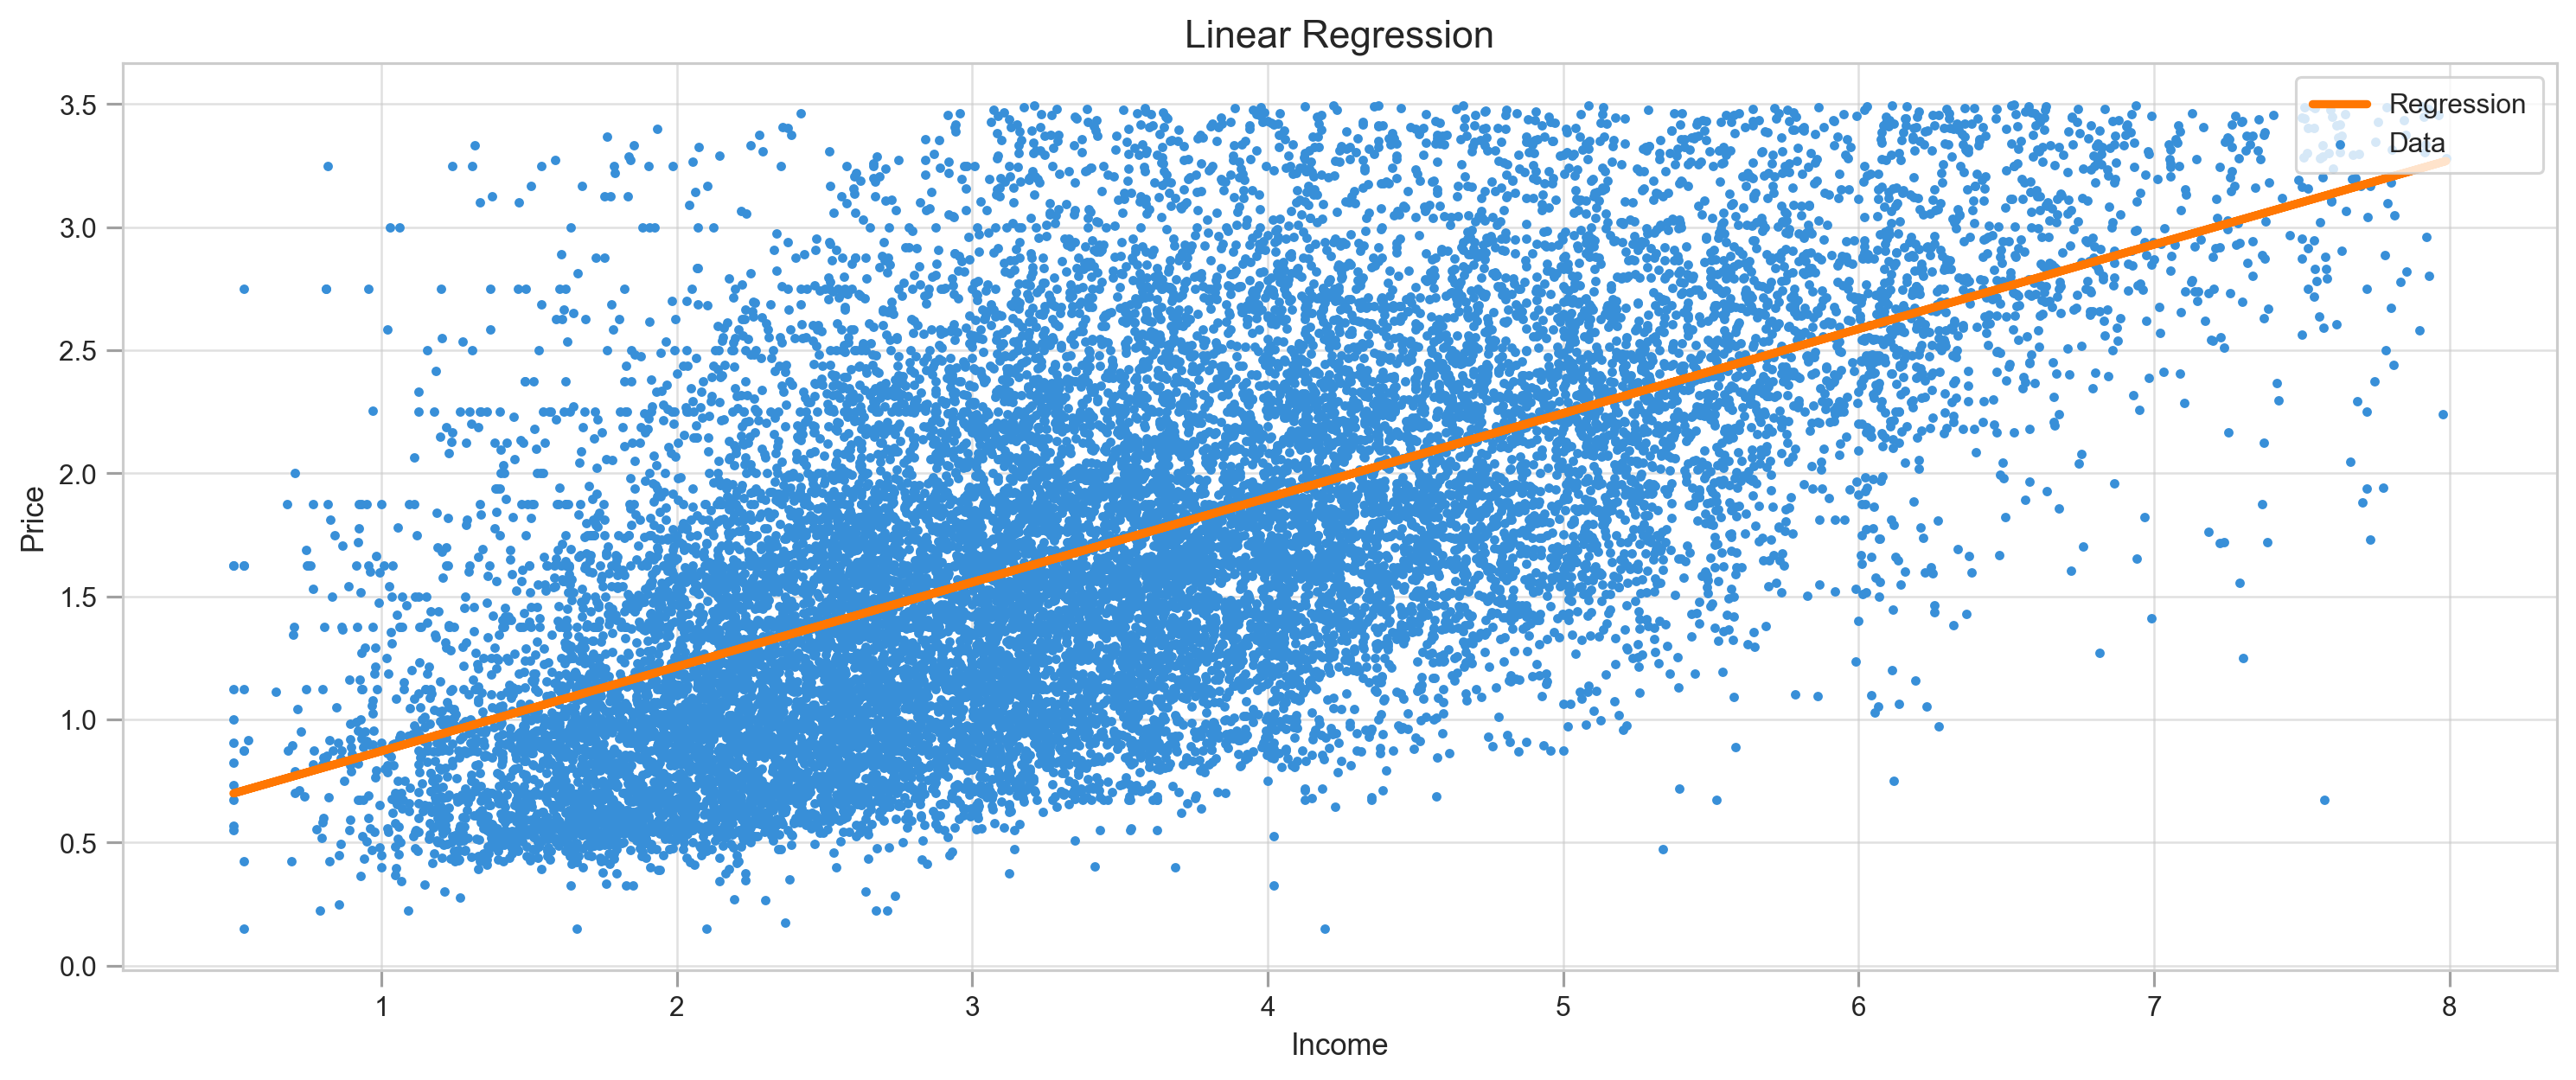

Result of our model is the regression line. Just by looking at the graph we can tell that data points go well above and beyond our line, making predictions approximate.

# Gradient Descent

### Abstract

The idea behind gradient descent is simple - by gradually tuning parameters, such as slope (`m`) and the intercept (`b`) in our regression function `y = mx + b`, we minimize cost. 
By cost, we usually mean some kind of a function that tells us how far off our model predicted result. For regression problems we often use `mean squared error` (MSE) cost function. If we use gradient descent for the classification problem, we will have a different set of parameters to tune.

### $$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$

Now we have to figure out how to tweak parameters `m` and `b` to reduce MSE.

### Partial Derivatives

We use partial derivatives to find how each individual parameter affects MSE, so that's where word _partial_ comes from. In simple words, we take the derivative with respect to `m` and `b` **separately**. Take a look at the formula below. It looks almost exactly the same as MSE, but this time we added f(m, b) to it. It essentially changes nothing, except now we can plug `m` and `b` numbers into it and calculate the result.

### $$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$

This formula (or better say function) is better representation for further calculations of partial derivatives. We can ignore sum for now and what comes before that and focus only on $y - (mx + b)^2$.

### Partical Derivative With Respect to `m`

With respect to `m` means we derive parameter `m` and basically ignore what is going on with `b`, or we can say its 0. To derive with respect to `m` we will use chain rule.

# $$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$

Chain rule applies when one function sits inside of another. If you're new to this, you'd be surprised that $()^2$ is outside function, and $y-(\boldsymbol{m}x+b)$ sits inside it. So, the chain rule says that we should take a derivative of outside function, keep inside function unchanged and then multiply by derivative of the inside function. Lets write these steps down:

# $$ (y - (mx + b))^2 $$

 1. Derivative of $()^2$ is $2()$, same as $x^2$ becomes $2x$
 2. We do nothing with $y - (mx + b)$, so it stays the same
 3. Derivative of $y - (mx + b)$ with respect to **_m_** is $(0 - (x + 0))$ or $-x$, because **_y_** and **_b_** are constants, they become 0, and derivative of **_mx_** is **_x_**
 
Multiply all parts we get following: $2 * (y - (mx+b)) * -x$. 
Looks nicer if we move -x to the left: $-2x *(y-(mx+b))$. There we have it. The final version of our derivative is the following:

### $$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$

Here, $\frac{df}{dm}$ means we find partial derivative of function f (we mentioned it earlier) with respect to m. We plug our derivative to the summation and we're done.

### Partical Derivative With Respect to `b`

Same rules apply to the derivative with respect to b.

1. $()^2$ becomes $2()$, same as $x^2$ becomes $2x$
2. $y - (mx + b)$ stays the same
3. $y - (mx + b)$ becomes $(0 - (0 + 1))$ or $-1$, because **_y_** and **_mx_** are constants, they become 0, and derivative of **_b_** is 1

Multiply all the parts together and we get $-2(y-(mx+b))$

### $$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$

### Final Function

Few details we should discuss befor jumping into code:
1. Gradient descent is an iterative process and with each iteration (`epoch`) we slightly minimizing MSE, so each time we use our derived functions to update parameters `m` and `b`
2. Because its iterative, we should choose how many iterations we take, or make algorithm stop when we approach minima of MSE. In other words when algorithm is no longer improving MSE, we know it reached minimum.
3. Gradient descent has an additional parameter learning rate (`lr`), which helps control how fast or slow algorithm going towards minima of MSE

Thats about it. So you can already understand that Gradient Descent for the most part is just process of taking derivatives and using them over and over to minimize function.

**TASK TO COMPLETE**

In [19]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    
    '''
    Gradient Descent for a single feature
    '''
    
    # parameters
    
    # lists to store learning process
    
    # number of samples
    
    
    # your code

### Predicting House Price With Gradient Descent

MSE: 0.3493097403876614


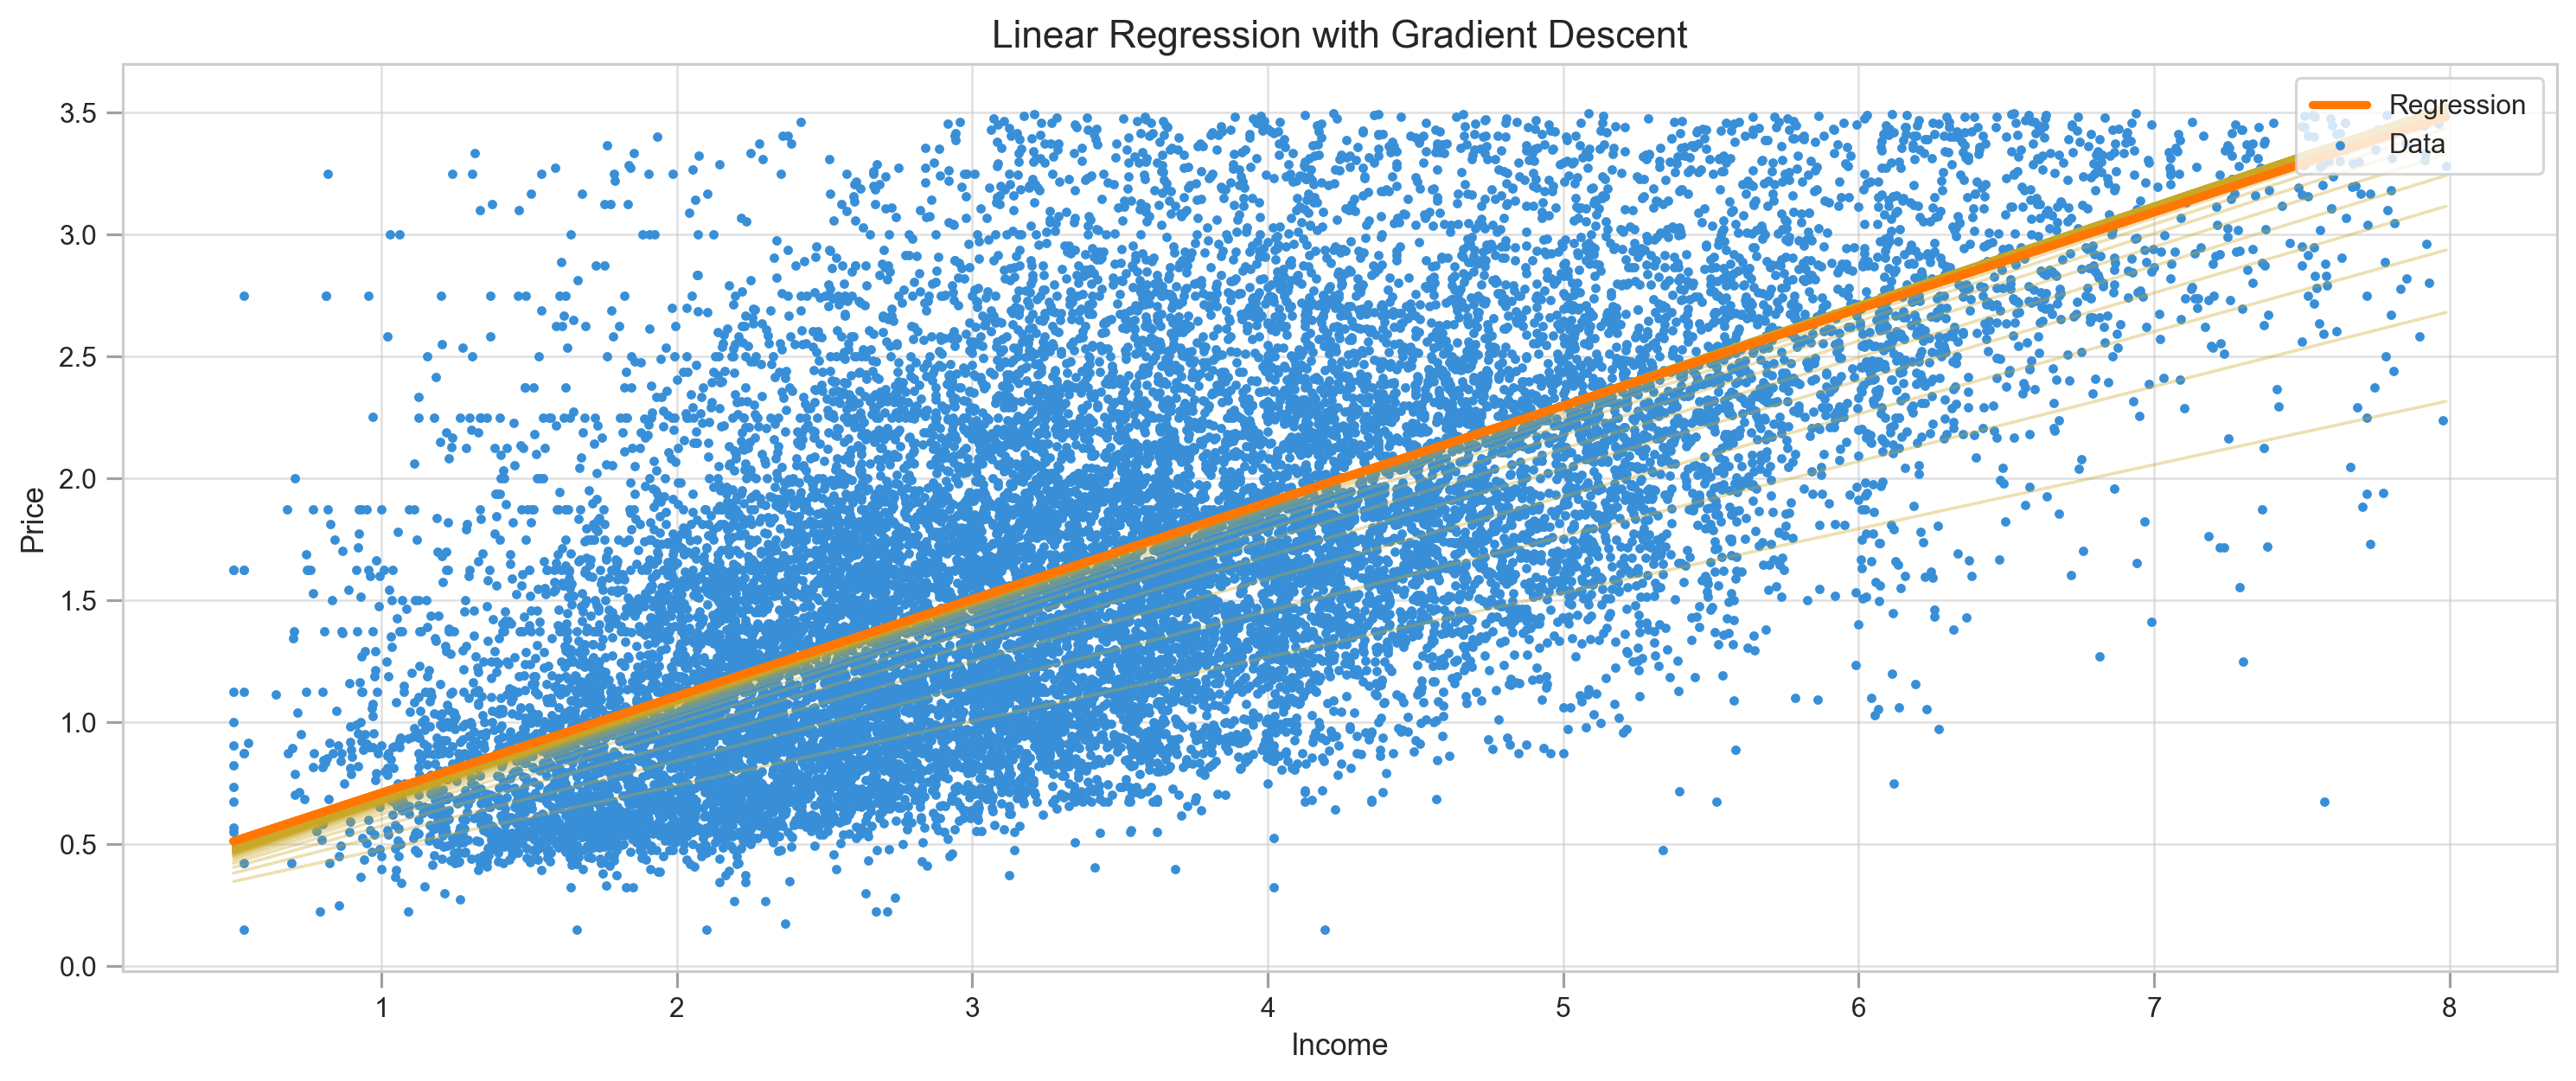

<ipython-input-20-e56a846a01a2>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Gradient Descent Optimization', fontSize=14)


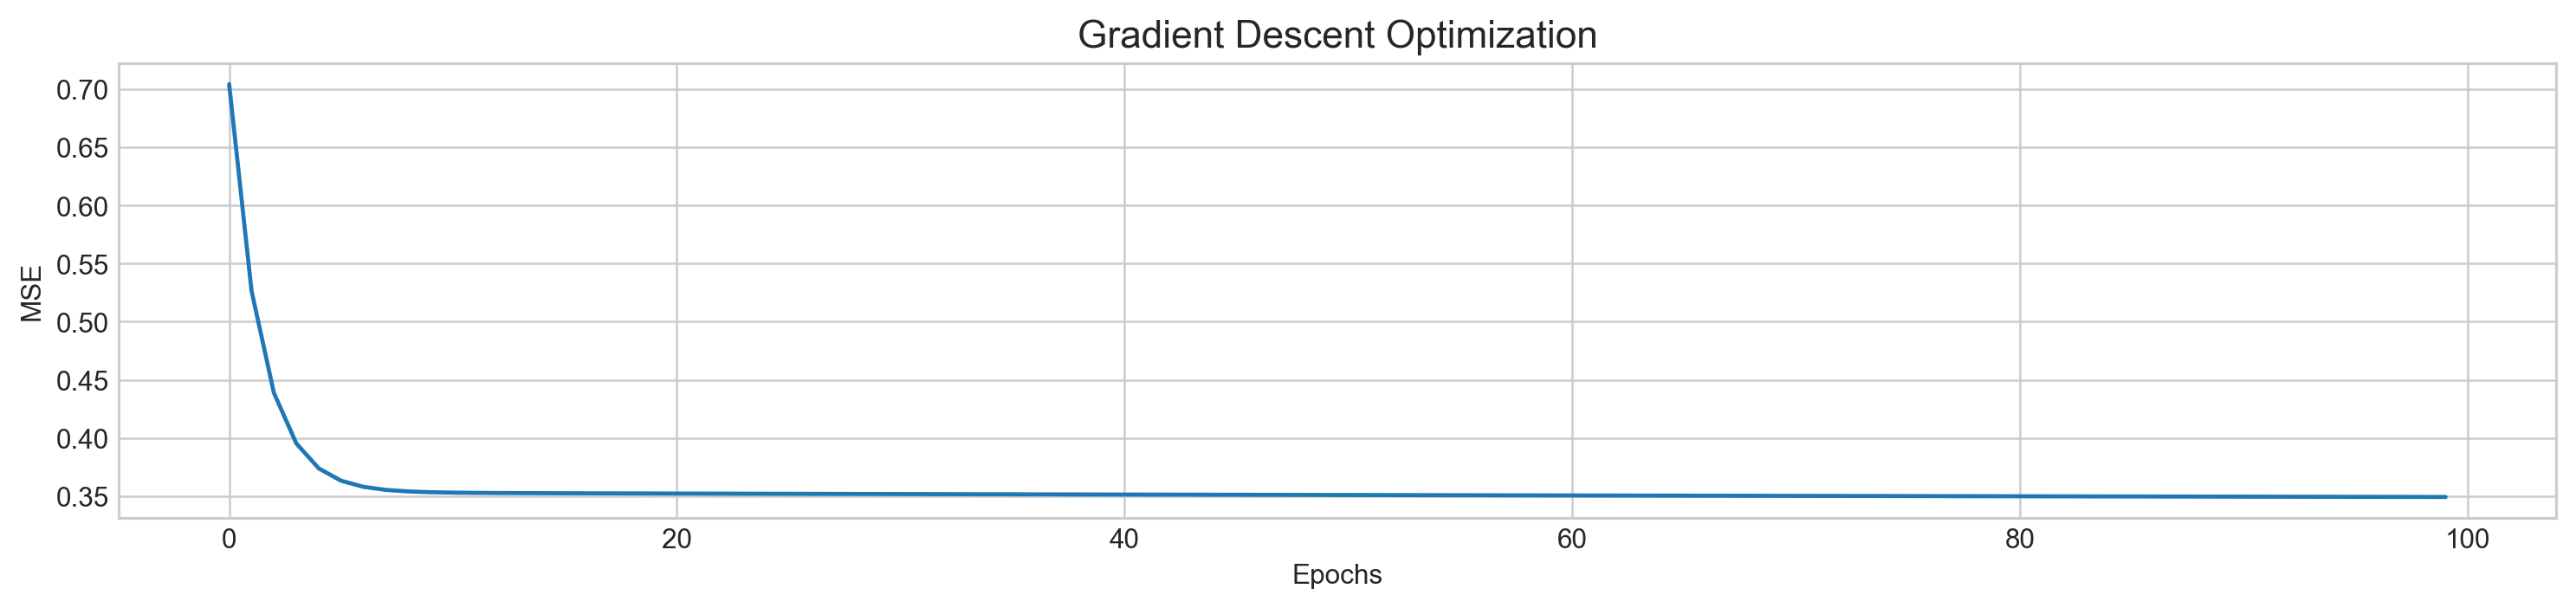

In [20]:
X = df.MedInc
y = df.Target

m, b, log, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with Gradient Descent")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

SCORE: 0.3

### Expected result
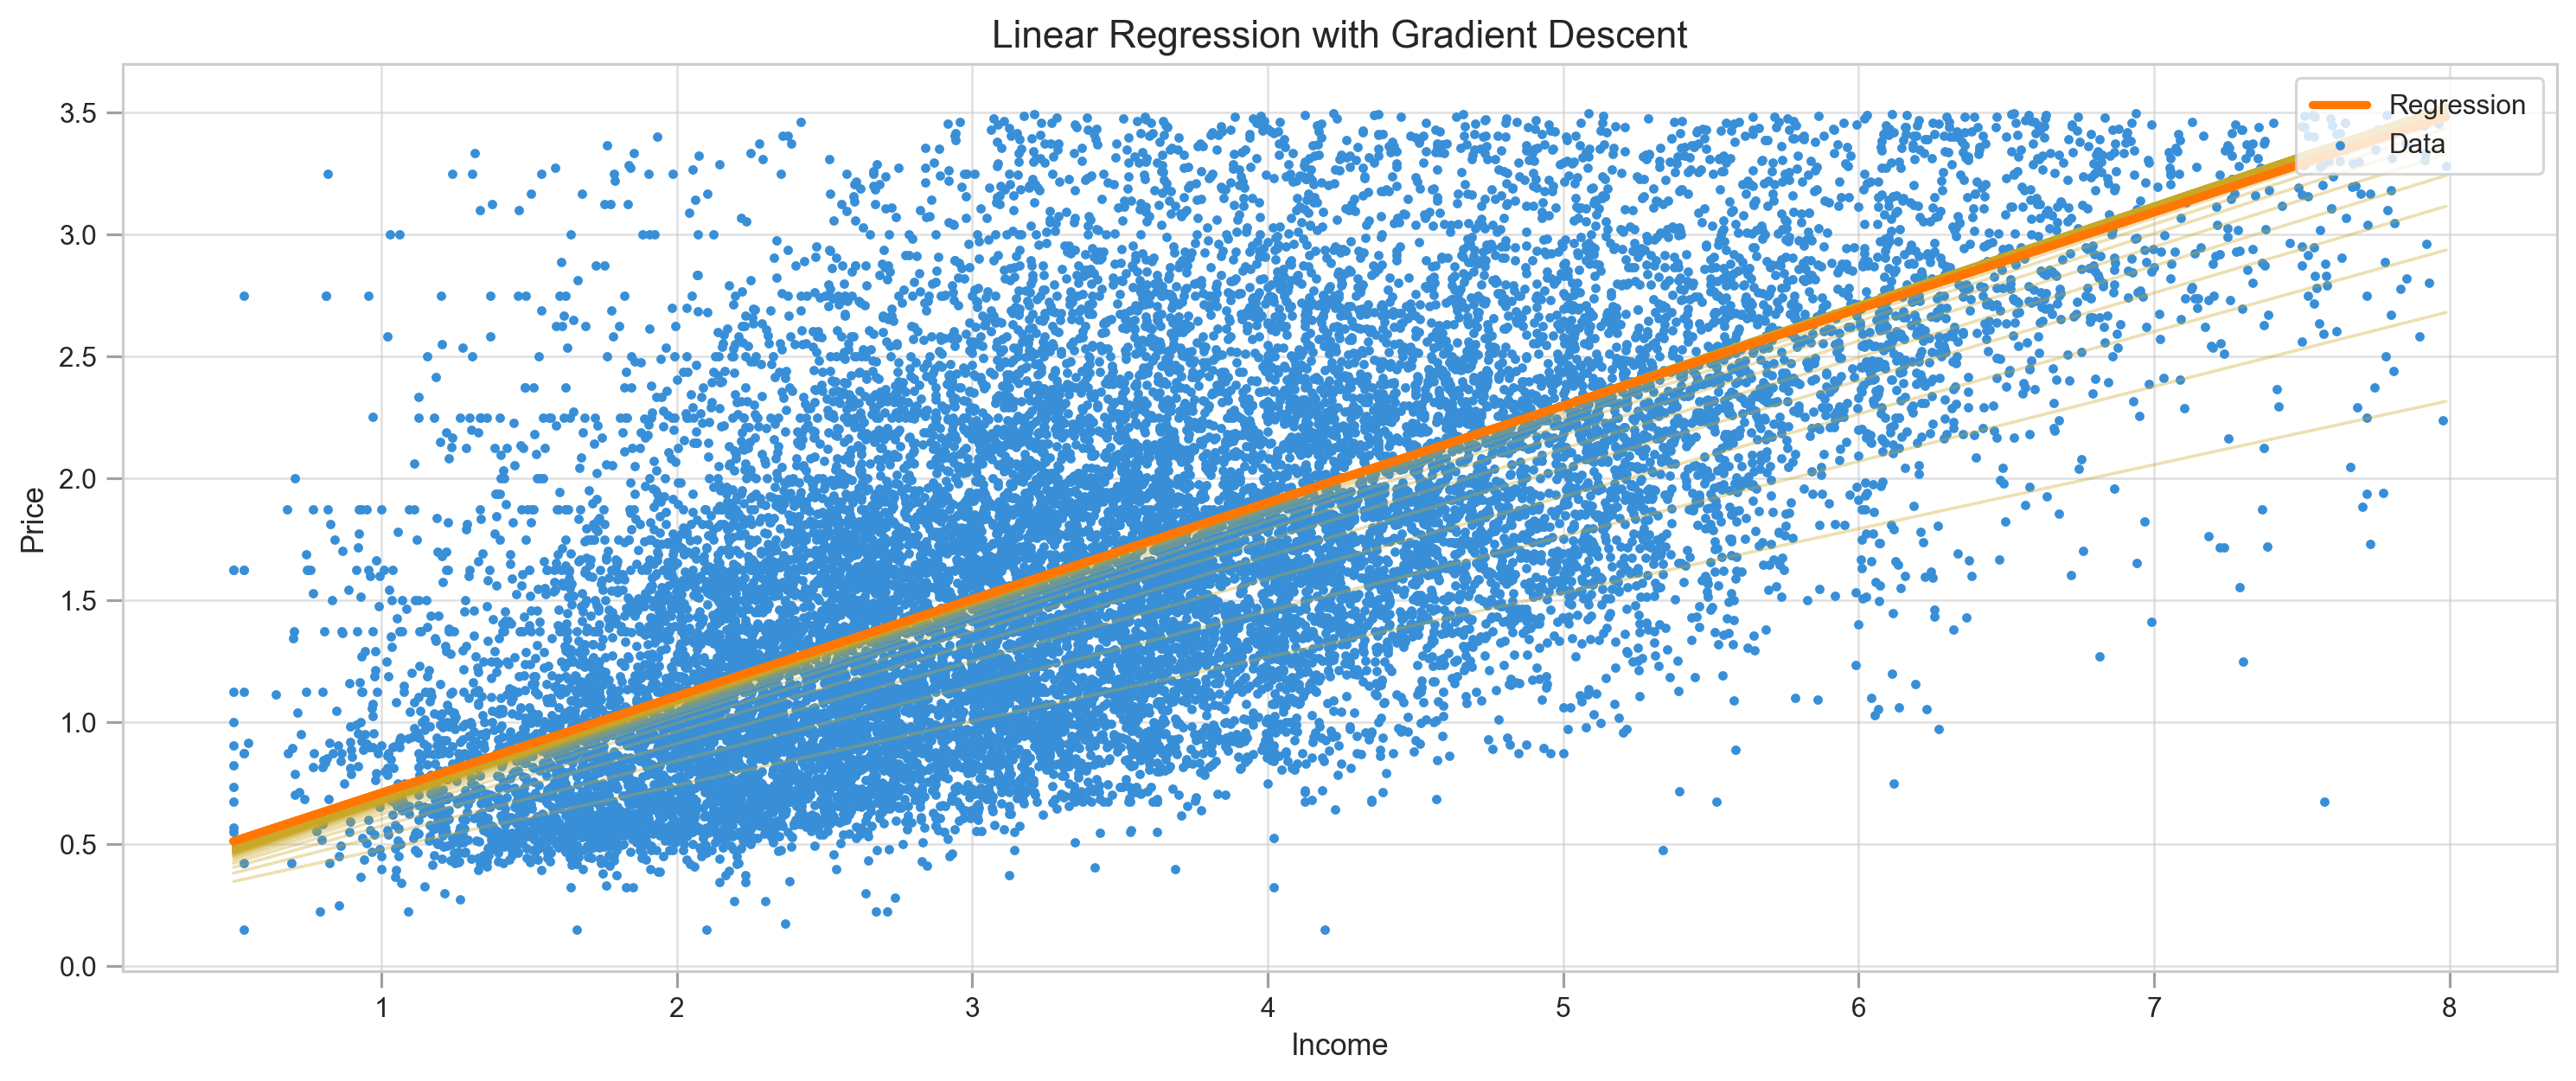



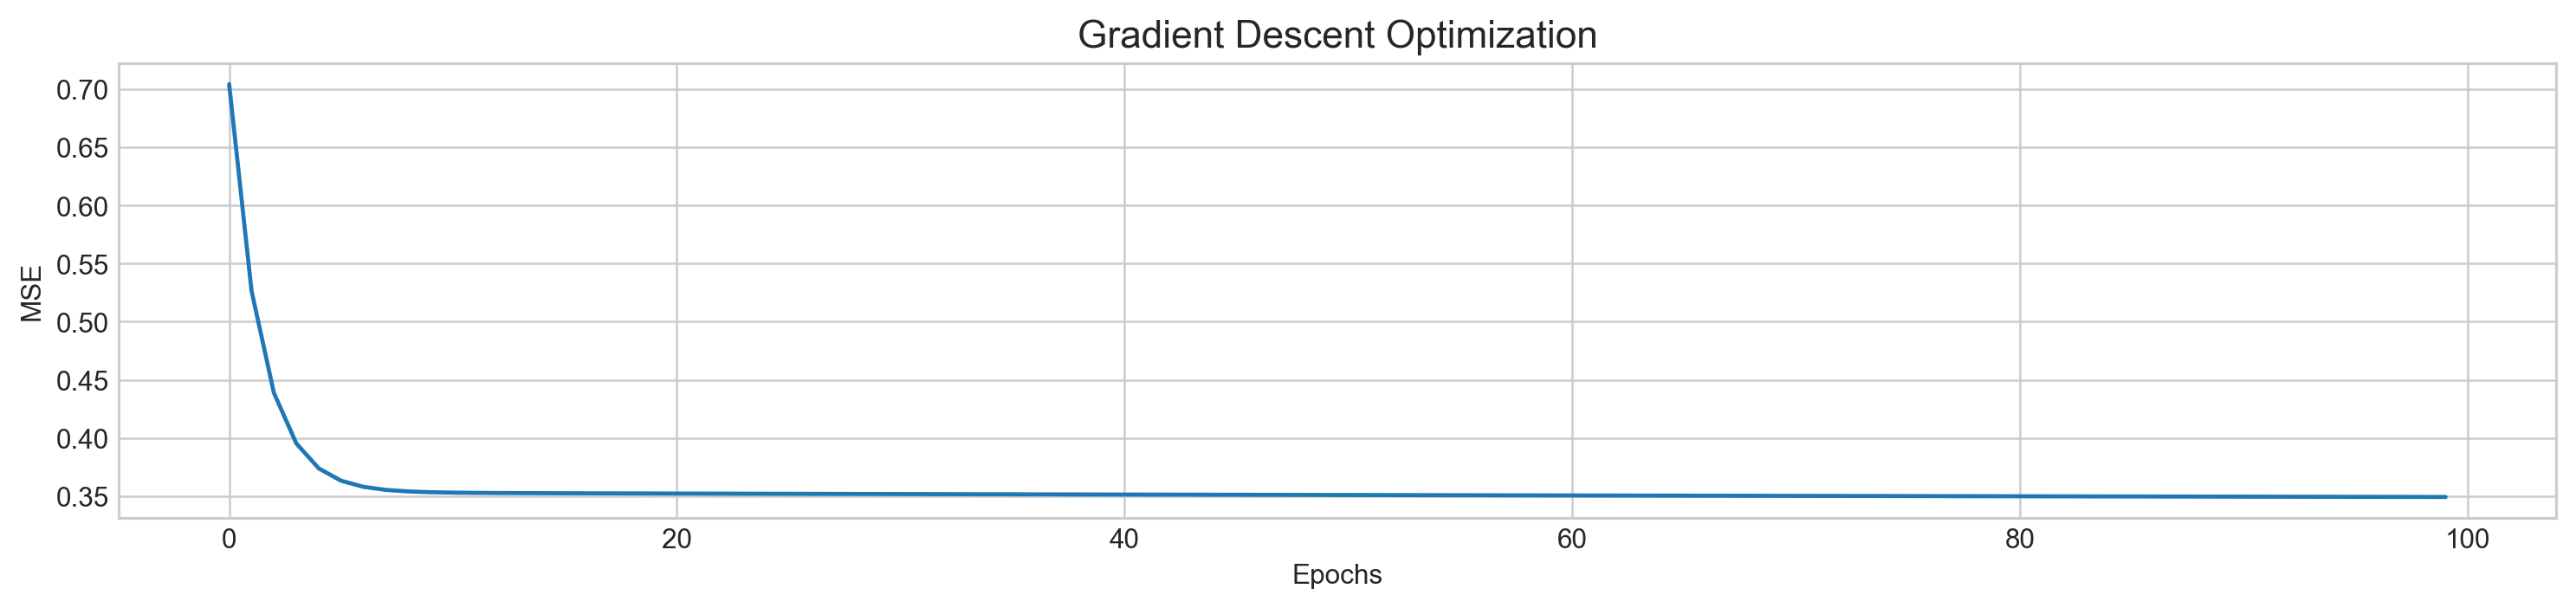

## Conclusion

Write the conlusion

# Newton-Raphson Root Approximation

Perform the prediction with Newton-Raphson Method

**TASK TO COMPLETE**

In [29]:
X = X
Y = y

In [30]:
poly = np.polyfit(X, Y, deg = 15)
terms = list()
prime = list()

# f(x)
def fx(to):
    # your code

# f'(x)
def Fx(to):
    # your code

## Max Itterations ##
N = # your code


## Tolerance ##
TOL = # your code


## t naught ##
to = 1.5
t = 0
tol = 2

for i in range(1,N):
    # your code


Tolerance Exit Used
After 45 itterations, p=10.427501209996315 with a tolorance of 3.327276232312215e-10


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Draw the plots to show the results of the Method


In [ ]:
# your code


SCORE: 0.3